In [1]:
# #####################################################
# This is a demo for using chili-etc: CHILI Exposure Time Calculator              #
# #####################################################
# CHILI-ETC is used for setting the CHILI exposure time parameters. by YuLiang yuliang@shao.ac.cn . 
# This work is based on the work of the predecessors
# (by Lin Lin@SHAO: https://ifs-etc.readthedocs.io/en/latest/quickstart.html), 
# and has been modified and completed on the basis of it.

source code:
https://github.com/git-yuliang/chili-etc


# 1. 该工作很大程度是在林琳老师的基础上实现的，仅修改和调试了部分参数。然后可以独立发布和运行。

# 2. 该工作目前值完成了框架部分，很多参数，例如CCD参数、光谱模板等可能还需要修改善。

# 3. 目前只有一维的光谱计算，如果需要二维结果，可以结合chili_reconstrct  https://github.com/git-yuliang/chili_reconstruct

# 项目配合实现。或者后续进一步将两个工作合成打包成一个package。


In [2]:
#  Some parameters have been modified, such as telescope diameter ...etc
#  However, there are still some paramets should be changed. such as CCD pixel size, FOV, read noise...etc.

def get_telescope_config():
    dict_t = {}
    dict_t['diameter'] = 240                          # unit: cm?
    dict_t['obscure'] = 0.                            # 
    dict_t['coll_area'] = 31415.926535897932          # Unit: 1E4 * Pi ?
    return dict_t

# dict_i : means dict_instrument, need be updated by CHILI parameters
def get_instrument_config(readout_xbin=1, readout_ybin=1, gain=1, dark=0.017):
    dict_i = dict()
    # user parameter
    dict_i['readout_xbin'] = readout_xbin
    dict_i['readout_ybin'] = readout_ybin
    dict_i['gain'] = gain                           # e/ADU
    dict_i['dark'] = dark                           # e/s/pix
    dict_i['readout_noise'] = 4.0                   # e/pix
    dict_i['QE'] = 1.0                              # e/pix
    dict_i['efficiency_file'] = 'chili_IFU_throughput.dat'
    # hidden parameters
    dict_i['ccd_xsize'] = 1.755555                              # wavelenght dircection, A, delta_lambda_per_pixel
    dict_i['ccd_ysize'] = 0.1                                   # spatial direction, arcsec, spatial axis
    dict_i['extract_aper_width'] = 2 * dict_i['readout_ybin']   # binning in spatial dirction, extract spectrum with aperture of 2 pixels
    dict_i['spaxel_xsize'] = 0.2                                # arcsec
    dict_i['spaxel_ysize'] = dict_i['extract_aper_width'] * 0.1   #pixel index to unit of arcsec
    dict_i['fov_xsize'] = 6                                     # arcsec
    dict_i['fov_ysize'] = 6                                     # arcsec
    dict_i['wave_start'] = 3500
    dict_i['wave_end'] = 10000
    dict_i['wave_delta'] = dict_i['ccd_xsize'] * dict_i['readout_xbin']
    return dict_i
###############################

# All the code can be download at：
https://github.com/git-yuliang/chili-etc

# chili_etc has been released to PYPI website:
https://pypi.org/project/chili-etc/

## Spectrum Templates:
- strong emmision line model: SFgal_texp_FeH-2_tau10_Ew200.fits
- weak emmision line model: SFgal_texp_FeH0_tau5_Ew10.fits
- elliptical galaxy spectral type: SFgal_texp_FeH0_tau1_Ewd.fits
- AGN type 1: SFgal_texp_FeH0_tau5_Ew10_AGN1.fits

## Calculation mode:
- 'exptime2snr'
- 'snr2exptime'
- 'snr2limitmag'

## The chili_perform_calculation output results:
- report.__dict__ lists all the information in the result
- report['snr'] contains the signal-to-noise ratio generated by the calculation
- report['readnoise], report['darknoise'], report['sourcenoise'] contain different types of noise.
- report['mockwave'], report['mockflux'], report['mockerror'] provide the mock spectrum of the observation

# chili_etc install: you can install the chili_etc package by using the pip tool.

pip install chili-etc   

https://pypi.org/project/chili-etc/

# Then you can use it:

In [2]:
from chili_etc.sp.chili_config import build_default_calc
from chili_etc.sp.chili_perform_calculation import perform_calculation
import matplotlib.pyplot as plt

[0.10926871 0.1105172  0.1117416  ... 0.31282212 0.31174649 0.310768  ]


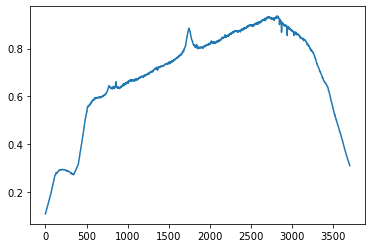

In [5]:
# to calcutlate the SNR
# input: exptime and other parameters
# output: SNR
def get_instrument_config_new(readout_xbin=1, readout_ybin=1, gain=1, dark=0.017):
    dict_i = dict()
    # user parameter
    dict_i['readout_xbin'] = readout_xbin
    dict_i['readout_ybin'] = readout_ybin
    dict_i['gain'] = gain                           # e/ADU
    dict_i['dark'] = dark                           # e/s/pix
    dict_i['readout_noise'] = 4.0                   # e/pix
    dict_i['QE'] = 1.0                              # e/pix
    dict_i['efficiency_file'] = 'chili_IFU_throughput.dat'
    # hidden parameters
    dict_i['ccd_xsize'] = 1.755555                   # wavelenght dircection, A, delta_lambda_per_pixel
    dict_i['ccd_ysize'] = 0.1                                   # spatial direction, arcsec, spatial axis
    dict_i['extract_aper_width'] = 2 * dict_i['readout_ybin']   # binning in spatial dirction, extract spectrum with aperture of 2 pixels
    dict_i['spaxel_xsize'] = 0.2                                # arcsec
    dict_i['spaxel_ysize'] = dict_i['extract_aper_width'] * 0.1   #pixel index to unit of arcsec
    dict_i['fov_xsize'] = 6                                     # arcsec
    dict_i['fov_ysize'] = 6                                     # arcsec
    dict_i['wave_start'] = 3500
    dict_i['wave_end'] = 10000
    dict_i['wave_delta'] = dict_i['ccd_xsize'] * dict_i['readout_xbin']
    return dict_i

chili_config = build_default_calc()
#chili_config['configuration'] = get_instrument_config_new()
chili_config['obst'] = 300
chili_config['repn'] = 3
chili_config['source']['normalization']['value'] = 20.0
chili_config['source']['spectrum']['name'] = 'SFgal_texp_FeH0_tau5_Ew10_AGN1.fits'

report = perform_calculation(chili_config,calculation_mode='exptime2snr')
print(report.snr)

plt.plot(report.snr)    # exptime to snr

#report.__dict__

In [1]:
from astropy.io import fits

# Here, you may need to change the dir of the REFDATA in your one.
# Normally, you can find your pip package by import them in the python envirment. 
#>>> import chili_etc
#>>> chili_etc
# and then you will find your chili_etc package's loacation.
# if in linux system, your dir maybe:  /home/ly/miniconda3/lib/python3.9/site-packages/chile_etc/ refdata/sed/...
# if in windows system, your dir maybe: \C:\Users\DELL\Anaconda3\Lib\site-packages\chili_etc\refdata\sed/...

hdu = fits.open(r"../refdata/sed/SFgal_texp_FeH0_tau5_Ew10_AGN1.fits")
print(hdu[1].header)
imagn = hdu[1].data

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   16 / length of dimension 1                          NAXIS2  =                 5564 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    4 / number of table fields                         TTYPE1  = 'WAVELENGTH'                                                          TFORM1  = 'E       '                                                            TUNIT1  = 'angstrom'                                                            TTYPE2  = 'FLUX    '                                                            TFORM2  = 'E       '                    

3000.4521
10997.796
start and end wavepoint is: 3000.4521 10997.796
step of the waveband is: 1.437337122573688 Angstrom
target wave step is: 1.437337122573688 Angstrom


Text(0.5, 1.0, 'report.SNR')

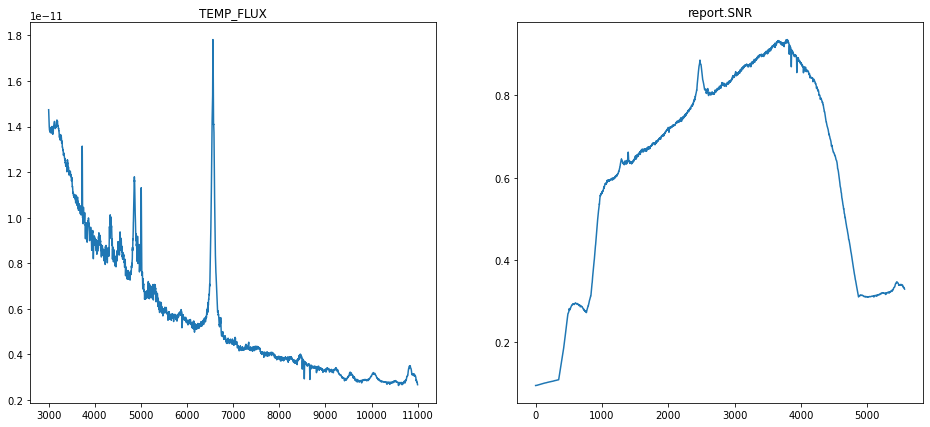

In [5]:
#print(imagn.shape)
imagn = hdu[1].data
template_wave = hdu[1].data['wavelength']
template_flux = hdu[1].data['flux'] * 1e-12
print(template_wave[0])
print(template_wave[-1])
n = 5564
stp = (template_wave[-1] - template_wave[0]) / n
print('start and end wavepoint is:',template_wave[0],template_wave[-1])
print('step of the waveband is:',stp,'Angstrom')
print('target wave step is:',stp,'Angstrom')

import matplotlib.pyplot as plt
plt.figure(figsize=[16,7])
plt.subplot(121)
plt.plot(template_wave,template_flux)
plt.title('TEMP_FLUX')
plt.subplot(122)
plt.plot(report.snr)
plt.title('report.SNR')

In [6]:
# to calcutlate the exposure time
# input: SNR and other parameters
# output: exposure time

chili_config = build_default_calc()    #load the default model
#chili_config['obst'] = 300             #change special parameters you want
chili_config['targetsnr'] = 20         #change special parameters target SNR
chili_config['repn'] = 3               #change special parameters you want
chili_config['source']['normalization']['value'] = 20.0    #change special parameters you want
chili_config['source']['spectrum']['name'] = 'SFgal_texp_FeH0_tau5_Ew10_AGN1.fits'  #change special parameters you want
report = perform_calculation(chili_config,calculation_mode='snr2exptime')
print('the expect exposure time is:',report.exptime)

#report.__dict__

the expect exposure time is: 1295214.3767826527


In [7]:
exptime = report.exptime
print(exptime.shape)

()


In [8]:
# snr to exptime
report = perform_calculation(chili_config, calculation_mode='snr2exptime')
print(report.exptime)

1295214.3767826527


[0.15230929 0.15456777 0.15638247 ... 0.13976809 0.13948203 0.13937489]


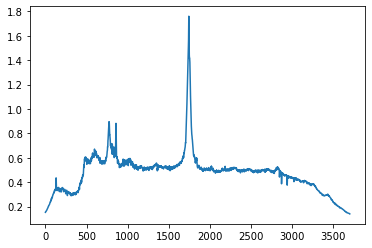

In [9]:
# EXPTIME to SNR
report = perform_calculation(chili_config, calculation_mode='exptime2snr')
print(report.snr)
plt.plot(report.snr)

In [10]:
# SNR TO LIMIT MAGNITUDE
report = perform_calculation(chili_config, calculation_mode='snr2limitmag')
print(report.limitmag)

15.20453377348931


In [11]:
# SNR2EXPTIME
config = build_default_calc()
config['targetsnr'] = 10                      ###
config['obst'] = 300
config['source']['normalization']['value'] = 18.0
config['source']['spectrum']['name'] = 'SFgal_texp_FeH0_tau1_Ewd.fits'
report = perform_calculation(config, calculation_mode='snr2exptime')
print(report.exptime)

6935.459285529389
